In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
trxData = pd.read_csv('datasetview/dunnhumby_transaction.csv', low_memory=False)
storeData = pd.read_csv('datasetview/dunnhumby_store.csv')
productData = pd.read_csv('datasetview/dunnhumby_products.csv')

In [3]:
# Removing the Null rows if exist in all the dataset
trxData = trxData.dropna(how = 'all')
storeData = storeData.dropna(how = 'all')
storeData.drop('Unnamed: 9', axis = 1, inplace = True)
storeData = storeData.drop_duplicates('STORE_ID')
productData = productData.dropna(how = 'all')


In [4]:
# Renaming the STORE_NUM column name to STORE_ID in the transaction data
trxData = trxData.rename(columns = {'STORE_NUM': 'STORE_ID'})

# The STORE_ID is stored as float in the transaction data, changing it to integer
trxData['STORE_ID'] = trxData['STORE_ID'].astype('int')

In [5]:
# Merge all the data into a single dataframe
data = trxData.merge(productData, on = 'UPC').merge(storeData, on = 'STORE_ID')

# Sort the data according to 'WEEK_END_DATE' column
data = data.sort_values(by = 'WEEK_END_DATE').reset_index(drop = True)

data.loc[:, 'UPC'] = data['UPC'].astype('int64').astype('str')

### What is the range of prices offered on products? 

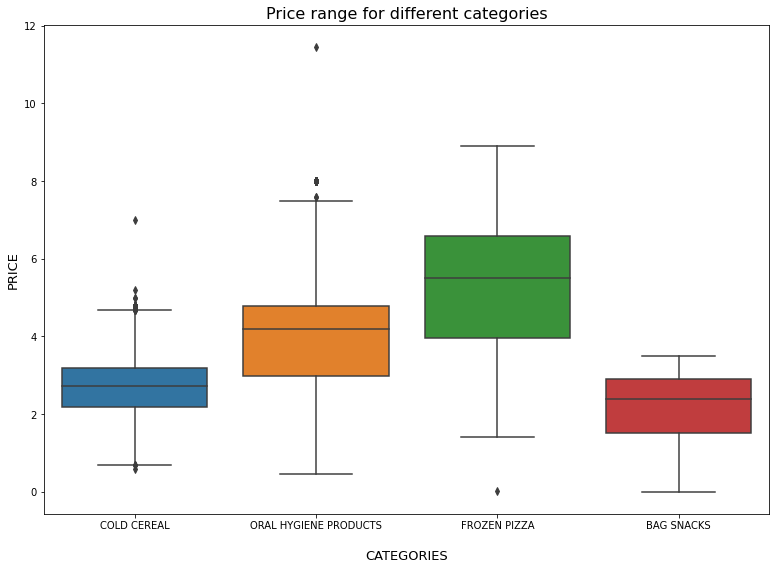

In [6]:
plt.figure(figsize = (13,9))
sns.boxplot(data = data, x = 'CATEGORY', y = 'PRICE')
plt.title('Price range for different categories', fontsize = 16)
plt.ylabel('PRICE', fontsize = 13)
plt.xlabel('\nCATEGORIES', fontsize = 13)
plt.show()

To find out the price range of different categories, we create a boxplot which tells us the minimum, first quartile, median, third quartile, and maximum price. The minimum and maximum prices might be outliers but the first and third quartiles gives us the range of prices offered on the products.

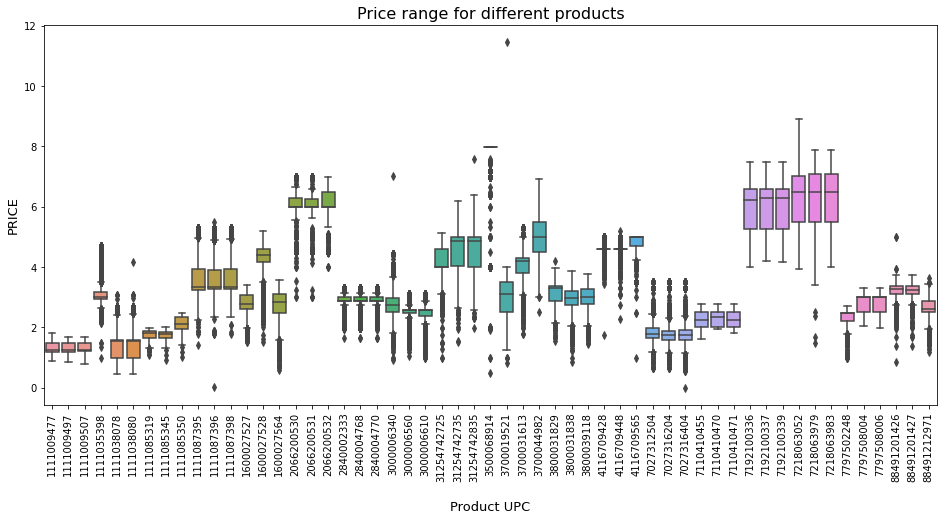

In [7]:
plt.figure(figsize = (16,7))
sns.boxplot(data = data, x = 'UPC', y = 'PRICE')
plt.title('Price range for different products', fontsize = 16)
plt.ylabel('PRICE', fontsize = 13)
plt.xlabel('\nProduct UPC', fontsize = 13)
plt.xticks(rotation = 90)
plt.show()

### Are there specific price thresholds that, if crossed, drive significant differences in sales? 

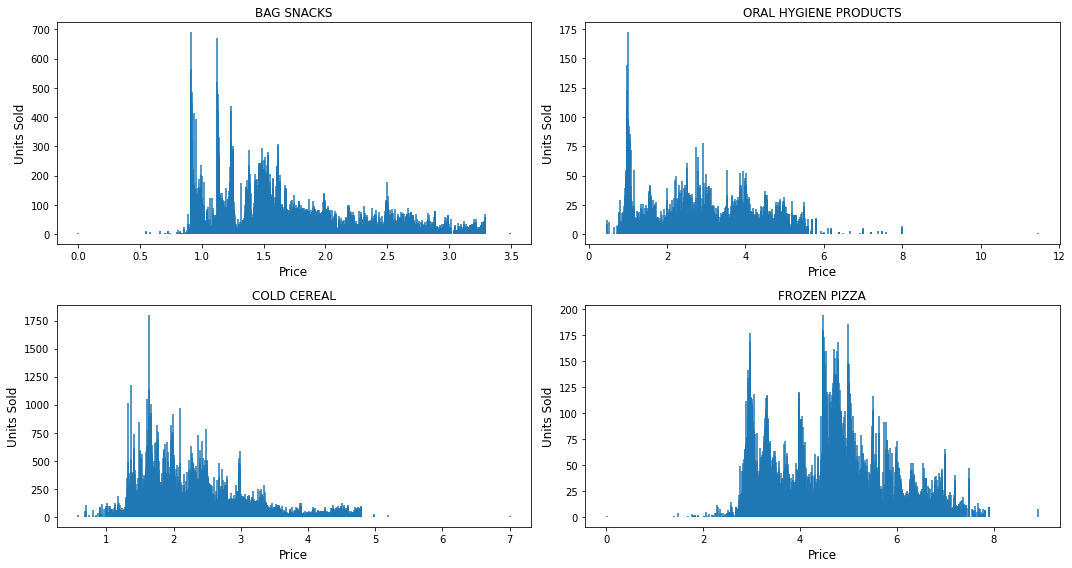

In [8]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.vlines(x = data[data['CATEGORY'] == 'BAG SNACKS']['PRICE'], 
           ymin = 0, 
           ymax = data[data['CATEGORY'] == 'BAG SNACKS']['UNITS'])
plt.title('BAG SNACKS')
plt.xlabel('Price', fontsize = 12)
plt.ylabel('Units Sold', fontsize = 12)

plt.subplot(2,2,2)
plt.vlines(x = data[data['CATEGORY'] == 'ORAL HYGIENE PRODUCTS']['PRICE'], 
           ymin = 0, 
           ymax = data[data['CATEGORY'] == 'ORAL HYGIENE PRODUCTS']['UNITS'])
plt.title('ORAL HYGIENE PRODUCTS')
plt.xlabel('Price', fontsize = 12)
plt.ylabel('Units Sold', fontsize = 12)

plt.subplot(2,2,3)
plt.vlines(x = data[data['CATEGORY'] == 'COLD CEREAL']['PRICE'], 
           ymin = 0, 
           ymax = data[data['CATEGORY'] == 'COLD CEREAL']['UNITS'])
plt.title('COLD CEREAL')
plt.xlabel('Price', fontsize = 12)
plt.ylabel('Units Sold', fontsize = 12)

plt.subplot(2,2,4)
plt.vlines(x = data[data['CATEGORY'] == 'FROZEN PIZZA']['PRICE'], 
           ymin = 0, 
           ymax = data[data['CATEGORY'] == 'FROZEN PIZZA']['UNITS'])
plt.title('FROZEN PIZZA')
plt.xlabel('Price', fontsize = 12)
plt.ylabel('Units Sold', fontsize = 12)

plt.tight_layout()
plt.show()

The above subplots show the graphs for price vs units sold. The x-axis shows the Price of the products and the y-axis shows the number of units sold. In all of the graphs, we can see some hikes which means that at those specific prices, the higher number of units are sold so it means there are specific price threshold for each category.

### What is the price elasticity of the products? What will happen to unit sales if the price changes by X%?

In [9]:
weeklyGroupData = data.groupby(['WEEK_END_DATE', 'CATEGORY']).sum().reset_index()

In [10]:
bagSnacks = weeklyGroupData[weeklyGroupData['CATEGORY'] == 'BAG SNACKS']
oralHygiene = weeklyGroupData[weeklyGroupData['CATEGORY'] == 'ORAL HYGIENE PRODUCTS']
coldCereal = weeklyGroupData[weeklyGroupData['CATEGORY'] == 'COLD CEREAL']
frozenPizza = weeklyGroupData[weeklyGroupData['CATEGORY'] == 'FROZEN PIZZA']


In [11]:
bagSnacks.loc[:, '%DemandChange'] = round(bagSnacks['UNITS'].pct_change(), 3)
bagSnacks.loc[:, '%PriceChange'] = round(bagSnacks['PRICE'].pct_change(), 3)
bagSnacks.loc[:, 'PriceElasticity'] = round(bagSnacks['%DemandChange'] / bagSnacks['%PriceChange'], 3)

In [12]:
oralHygiene.loc[:, '%DemandChange'] = round(oralHygiene['UNITS'].pct_change(), 3)
oralHygiene.loc[:, '%PriceChange'] = round(oralHygiene['PRICE'].pct_change(), 3)
oralHygiene.loc[:, 'PriceElasticity'] = round(oralHygiene['%DemandChange'] / oralHygiene['%PriceChange'], 3)

In [13]:
coldCereal.loc[:, '%DemandChange'] = round(coldCereal['UNITS'].pct_change(), 3)
coldCereal.loc[:, '%PriceChange'] = round(coldCereal['PRICE'].pct_change(), 3)
coldCereal.loc[:, 'PriceElasticity'] = round(coldCereal['%DemandChange'] / coldCereal['%PriceChange'], 3)

In [14]:
frozenPizza.loc[:, '%DemandChange'] = round(frozenPizza['UNITS'].pct_change(), 3)
frozenPizza.loc[:, '%PriceChange'] = round(frozenPizza['PRICE'].pct_change(), 3)
frozenPizza.loc[:, 'PriceElasticity'] = round(frozenPizza['%DemandChange'] / frozenPizza['%PriceChange'], 3)

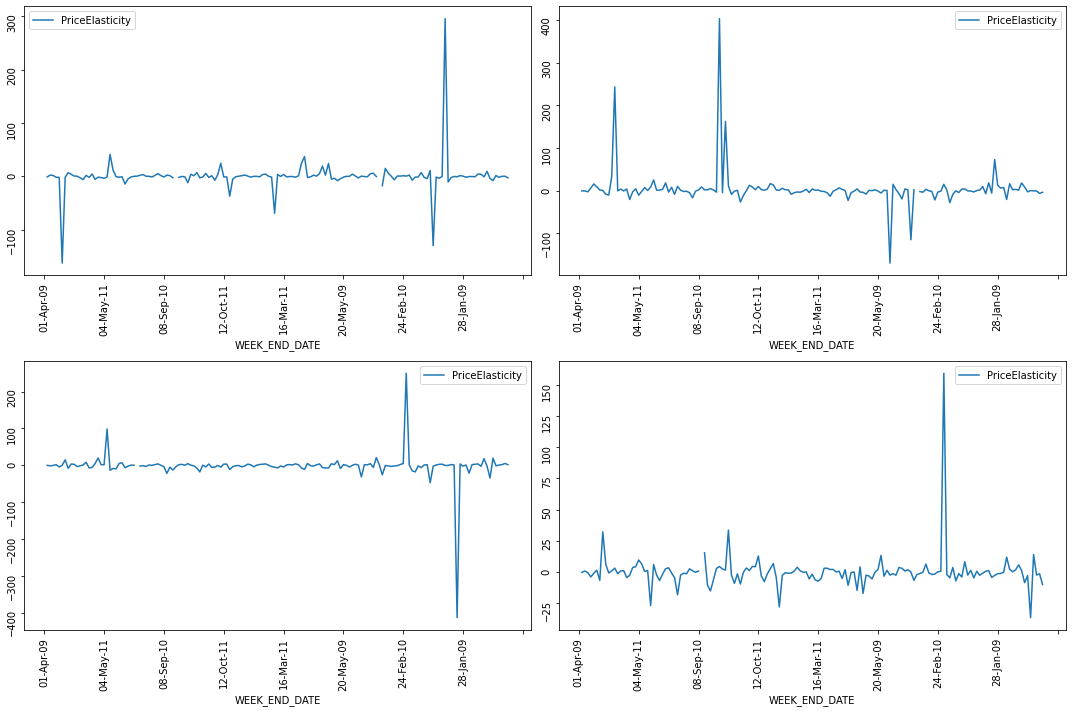

In [15]:
fig, axes = plt.subplots(2,2)
bagSnacks[['WEEK_END_DATE', 'PriceElasticity']].plot(x = 'WEEK_END_DATE', ax = axes[0,0], figsize = (15,10))
axes[0,0].tick_params(labelrotation = 90)

oralHygiene[['WEEK_END_DATE', 'PriceElasticity']].plot(x = 'WEEK_END_DATE', ax = axes[0,1], figsize = (15,10))
axes[0,1].tick_params(labelrotation = 90)

coldCereal[['WEEK_END_DATE', 'PriceElasticity']].plot(x = 'WEEK_END_DATE', ax = axes[1,0], figsize = (15,10))
axes[1,0].tick_params(labelrotation = 90)

frozenPizza[['WEEK_END_DATE', 'PriceElasticity']].plot(x = 'WEEK_END_DATE', ax = axes[1,1], figsize = (15,10))
axes[1,1].tick_params(labelrotation = 90)

plt.tight_layout()


The price elasticity of products refers to the extent of change in the demand of a specific product when the priced is changed by X%. We can calculate the price elasticity by first calculating the percent change in units sold, and the percent change in price. Price elasticity is then calculated by dividng the % Change in Demand by % Change in Price. 

For this analysis, we aggregate the sales data for the whole weeks in the data, and then find out the price elasticity of each category.

### What is the impact on sales of promotions, displays, or being featured in the circular? 

In [16]:
data.loc[:, 'Discount'] = data['BASE_PRICE'] - data['PRICE']
data = data[data['Discount'] >= 0]

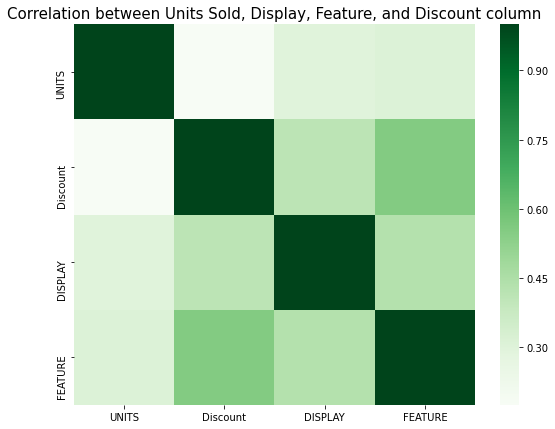

In [17]:
plt.figure(figsize = (9,7))
sns.heatmap(data[['UNITS', 'Discount', 'DISPLAY', 'FEATURE']].corr(), cmap = 'Greens')
plt.title('Correlation between Units Sold, Display, Feature, and Discount column', fontsize = 15)
plt.show()

The heatmap shows the correlation between the number of units sold, the discount, display, and feature attributes of the product. It can be seen that the number of units sold shows a moderate-to-high correlation with FEATURE and DISPLAY column, which means that there is a high chance of product being sold if it is either featured or shown in displays. Moreover, there is also a correlation between Discount and Units sold, but it is low as compared to the other two parameters.

### What is the impact on units/visit of promotions?

In [18]:
data.loc[:, 'units/visits'] = data['UNITS'] / data['VISITS']

In [19]:
data[['Discount', 'units/visits']].corr()

,Discount,units/visits
Discount,1.000000,0.104096
units/visits,0.104096,1.000000


We can see that the correlation between the Discount and 'Units/Visits' is around 0.1 which is very low. This means that promotions do have an impact on number of units sold per visit, but a very low impact!

### How do the above differ by products? By categories? 

In [20]:
UPCs = data['UPC'].unique()

correlations = []
for UPC in UPCs:
    filtered = data[data['UPC'] == UPC]
    corr = filtered[['Discount', 'units/visits']].corr()['Discount'][1]
    correlations.append(corr)
    
UPCs = [str(int(UPC)) for UPC in UPCs]

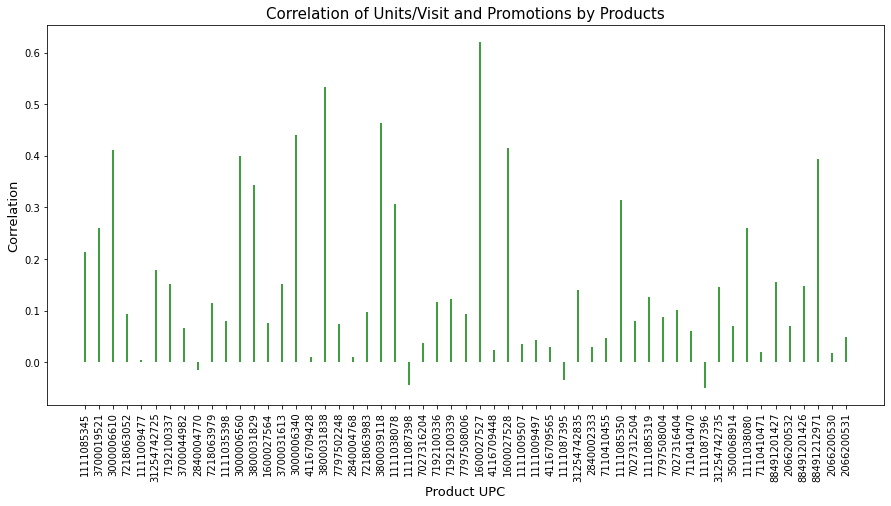

In [21]:
plt.figure(figsize = (15,7))
plt.vlines(x = UPCs, ymin = 0, ymax = correlations, color = 'green')
plt.xticks(UPCs, rotation = 90)
plt.title('Correlation of Units/Visit and Promotions by Products', fontsize = 15)
plt.xlabel('Product UPC', fontsize = 13)
plt.ylabel('Correlation', fontsize = 13)
plt.show()

The above graph shows the correlation between the number of units sold per visit and promotions by products. The x-axis shows the UPCs of the products, while y-axis shows the correlation. The higher the value of correlation, the more impact promotions have on number of units sold per visit and vice versa.

In [22]:
categories = data['CATEGORY'].unique()

correlations = []
for CATEGORY in categories:
    filtered = data[data['CATEGORY'] == CATEGORY]
    corr = filtered[['Discount', 'units/visits']].corr()['Discount'][1]
    correlations.append(corr)
    
categories = [str(CATEGORY) for CATEGORY in categories]

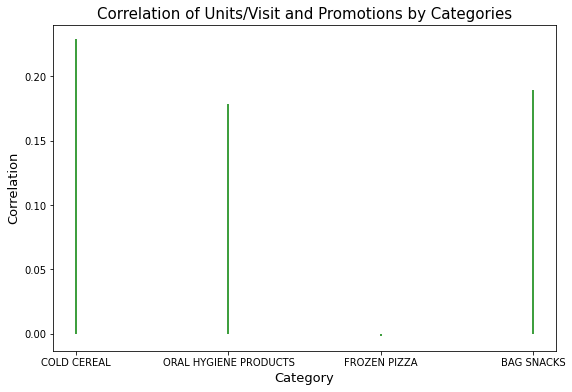

In [23]:
plt.figure(figsize = (9,6))
plt.vlines(x = categories, ymin = 0, ymax = correlations, color = 'green')
plt.xticks(categories, rotation = 0)
plt.title('Correlation of Units/Visit and Promotions by Categories', fontsize = 15)
plt.xlabel('Category', fontsize = 13)
plt.ylabel('Correlation', fontsize = 13)
plt.show()

The above graph shows the correlation between the number of units sold per visit and promotions by categories. The x-axis shows the categories, while y-axis shows the correlation. The higher the value of correlation, the more impact promotions have on number of units sold per visit and vice versa.

### How do the above differ by geographies?

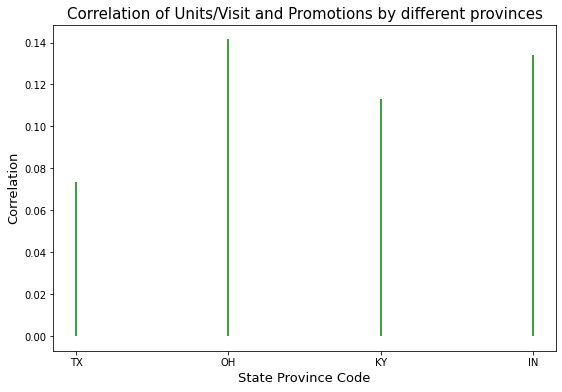

In [24]:
geographies = data['ADDRESS_STATE_PROV_CODE'].unique()

correlations = []
for geography in geographies:
    filtered = data[data['ADDRESS_STATE_PROV_CODE'] == geography]
    corr = filtered[['Discount', 'units/visits']].corr()['Discount'][1]
    correlations.append(corr)
    
geographies = [str(geography) for geography in geographies]

plt.figure(figsize = (9,6))
plt.vlines(x = geographies, ymin = 0, ymax = correlations, color = 'green')
plt.xticks(geographies, rotation = 0)
plt.title('Correlation of Units/Visit and Promotions by different provinces', fontsize = 15)
plt.xlabel('State Province Code', fontsize = 13)
plt.ylabel('Correlation', fontsize = 13)
plt.show()

### How do the above differ by store price tier (e.g., upscale stores vs. value stores)? 

In [25]:
priceTiers = data['SEG_VALUE_NAME'].unique()

correlations = []
for priceTier in priceTiers:
    filtered = data[data['SEG_VALUE_NAME'] == priceTier]
    corr = filtered[['Discount', 'units/visits']].corr()['Discount'][1]
    correlations.append(corr)
    
priceTiers = [str(priceTier) for priceTier in priceTiers]

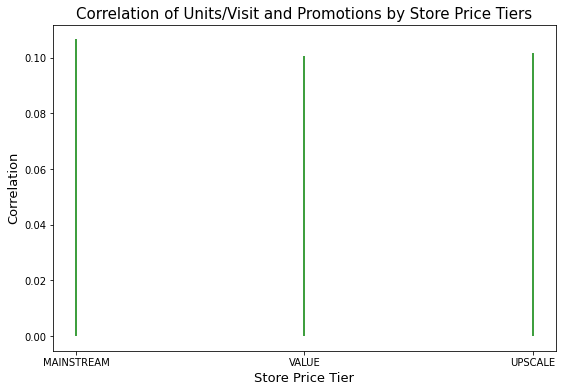

In [26]:
plt.figure(figsize = (9,6))
plt.vlines(x = priceTiers, ymin = 0, ymax = correlations, color = 'green')
plt.xticks(priceTiers, rotation = 0)
plt.title('Correlation of Units/Visit and Promotions by Store Price Tiers', fontsize = 15)
plt.xlabel('Store Price Tier', fontsize = 13)
plt.ylabel('Correlation', fontsize = 13)
plt.show()

We can see that for all of the price tiers, the correlation value is almost the same, which means it the promotions don't have any impact on number of units solds per visit based on the different store price tiers

### If you were the retailer, for which products would you be more likely to lower the price to increase sales? Why? 

If I were the retailer, then based on my analysis done in finding out the 'Correlation of Units/Visit and Promotions by Products', I will lower the price for product with UPC equal to **1600027527** and **3800031838** because these two have the highest and greater than 0.5 correlation between the units/visit and promotion. The higher value of correlation indicates that when these products are on promotion, then these are sold more per visit compared to the other products!

### If you were the retailer, for which products would you be more likely to increase the price to improve profits? Why? 

In [27]:
data.groupby('UPC').sum()['UNITS'].idxmax()

'1600027527'

If I were the retailer, then I would increase the price for the products that are sold the most since the product is in high demand and generating more sales of that specific product would help me improve the profits. In the data, the product which is sold most is with UPC **1600027527**

## Additional

### How many Units are sold by category both Featured and Non-Featured?

In [28]:
data.loc[:, 'FEATURE'] = data['FEATURE'].replace(0.0, 'Not-Featured')
data.loc[:, 'FEATURE'] = data['FEATURE'].replace(1.0, 'Featured')

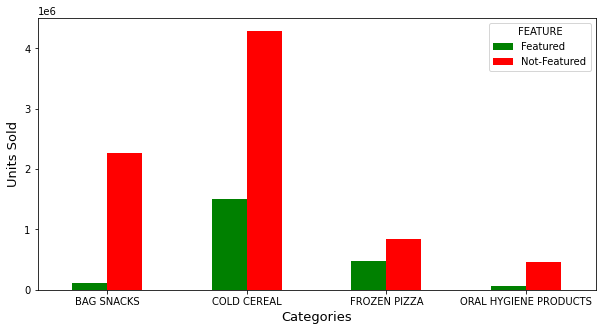

In [29]:
(data.groupby(['CATEGORY','FEATURE']).sum()['UNITS']).unstack().plot(kind = 'bar', color = ['green', 'red'], figsize = (10, 5))
plt.xlabel('Categories', fontsize = 13)
plt.ylabel('Units Sold', fontsize = 13)
plt.xticks(rotation = 0)
plt.show()

### How many Units are sold by category both Displayed and Non-Displayed?

In [30]:
data.loc[:, 'DISPLAY'] = data['DISPLAY'].replace(0.0, 'Not-Displayed')
data.loc[:, 'DISPLAY'] = data['DISPLAY'].replace(1.0, 'Displayed')

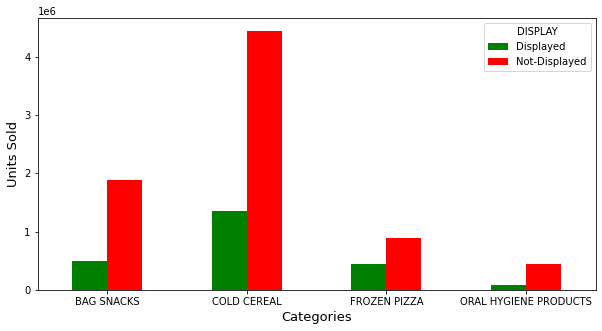

In [31]:
(data.groupby(['CATEGORY','DISPLAY']).sum()['UNITS']).unstack().plot(kind = 'bar', color = ['green', 'red'], figsize = (10, 5))
plt.xlabel('Categories', fontsize = 13)
plt.ylabel('Units Sold', fontsize = 13)
plt.xticks(rotation = 0)
plt.show()